<a href="https://colab.research.google.com/github/roberthsu2003/PythonForDataAnalysis/blob/master/%E5%85%A8%E6%96%B9%E9%9D%A2%E5%88%86%E6%9E%90/%E7%AB%99%E9%BB%9E2023%E5%B9%B4%E9%80%B2%E5%87%BA%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
幫我做多方面的分析

Here is all the data you need:
"每日各站進出站人數2023.csv"

## Data loading

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display its first few rows and shape to verify the loading process.



In [1]:
import pandas as pd

try:
    df_raw = pd.read_csv('每日各站進出站人數2023.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df_raw = pd.read_csv('每日各站進出站人數2023.csv', encoding='big5')
    except UnicodeDecodeError:
        print("Failed to load with both utf-8 and big5 encodings.")
        df_raw = None  # Set df_raw to None to indicate failure
    except FileNotFoundError:
        print("File not found.")
        df_raw = None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        df_raw = None
except FileNotFoundError:
    print("File not found.")
    df_raw = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_raw = None

if df_raw is not None:
    display(df_raw.head())
    print(df_raw.shape)

,trnOpDate,staCode,gateInComingCnt,gateOutGoingCnt
0,20230101,900,8030,8241
1,20230101,910,1017,1326
2,20230101,920,1400,1705
3,20230101,930,3558,4398
4,20230101,940,1509,1815


(86609, 4)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify potential issues, and gain initial insights.


**Reasoning**:
I need to examine the data types, check for missing values, analyze the distributions of key variables, and determine the overall shape of the data.



trnOpDate          int64
staCode            int64
gateInComingCnt    int64
gateOutGoingCnt    int64
dtype: object
trnOpDate          0
staCode            0
gateInComingCnt    0
gateOutGoingCnt    0
dtype: int64
trnOpDate          0.0
staCode            0.0
gateInComingCnt    0.0
gateOutGoingCnt    0.0
dtype: float64
       gateInComingCnt  gateOutGoingCnt
count     86609.000000     86609.000000
mean       2592.461315      2592.461315
std        5956.041777      5949.196607
min           0.000000         0.000000
25%         138.000000       142.000000
50%         646.000000       654.000000
75%        2046.000000      2006.000000
max       82689.000000     90865.000000


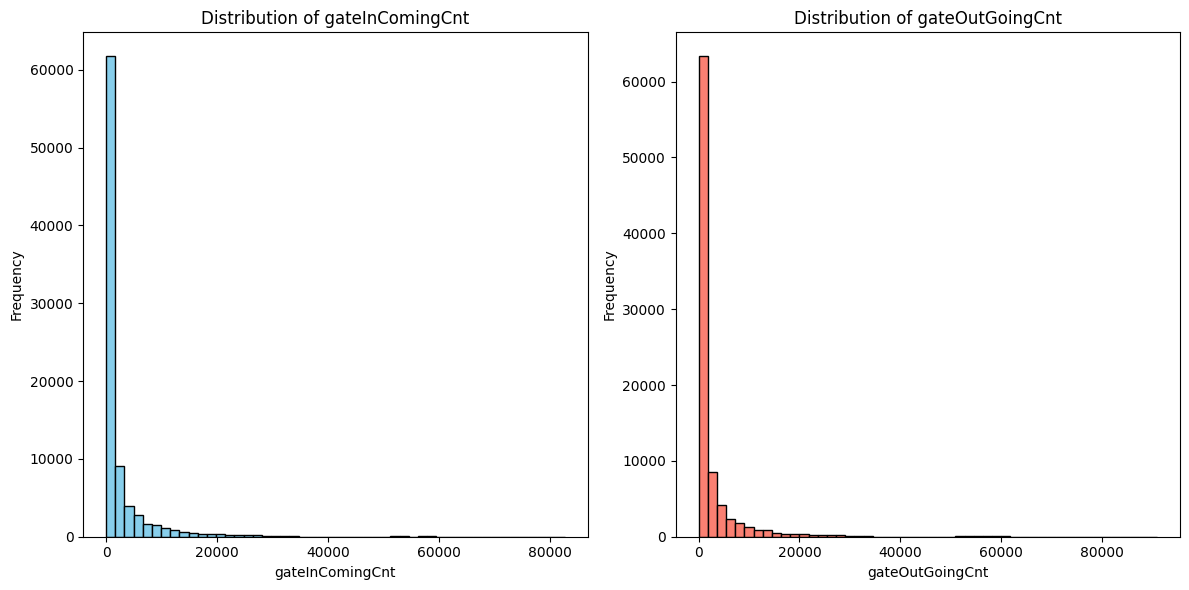

staCode
900     365
4380    365
4400    365
4410    365
4420    365
       ... 
5160    295
5140    198
5998     37
7140      3
5170      1
Name: count, Length: 241, dtype: int64
20230101
20231231
2023-01-01 00:00:00
2023-12-31 00:00:00
(86609, 4)


In [2]:
# Examine data types
print(df_raw.dtypes)

# Check for missing values
print(df_raw.isnull().sum())
print(df_raw.isnull().sum() / len(df_raw) * 100)

# Analyze distributions
print(df_raw[['gateInComingCnt', 'gateOutGoingCnt']].describe())
# Histograms
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_raw['gateInComingCnt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('gateInComingCnt')
plt.ylabel('Frequency')
plt.title('Distribution of gateInComingCnt')

plt.subplot(1, 2, 2)
plt.hist(df_raw['gateOutGoingCnt'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('gateOutGoingCnt')
plt.ylabel('Frequency')
plt.title('Distribution of gateOutGoingCnt')
plt.tight_layout()
plt.show()


# Analyze staCode
print(df_raw['staCode'].value_counts())

# Analyze trnOpDate
print(df_raw['trnOpDate'].min())
print(df_raw['trnOpDate'].max())
print(pd.to_datetime(df_raw['trnOpDate'], format='%Y%m%d').min())
print(pd.to_datetime(df_raw['trnOpDate'], format='%Y%m%d').max())

# Determine the overall shape
print(df_raw.shape)

## Data cleaning

### Subtask:
Clean the data by handling potential outliers in the 'gateInComingCnt' and 'gateOutGoingCnt' columns.


**Reasoning**:
Identify outliers in 'gateInComingCnt' and 'gateOutGoingCnt' using the IQR method and cap them at the 99th percentile. Create a new DataFrame `df_cleaned` with the handled outliers.



In [3]:
import numpy as np

def cap_outliers_iqr(df, column, percentile=99):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped = df.copy()
    df_capped[column] = np.clip(df[column], lower_bound, df[column].quantile(percentile / 100))
    return df_capped

df_cleaned = df_raw.copy()
df_cleaned = cap_outliers_iqr(df_cleaned, 'gateInComingCnt')
df_cleaned = cap_outliers_iqr(df_cleaned, 'gateOutGoingCnt')
display(df_cleaned.head())

,trnOpDate,staCode,gateInComingCnt,gateOutGoingCnt
0,20230101,900,8030.0,8241.0
1,20230101,910,1017.0,1326.0
2,20230101,920,1400.0,1705.0
3,20230101,930,3558.0,4398.0
4,20230101,940,1509.0,1815.0


## Data wrangling

### Subtask:
Wrangle the data by creating new features and converting the date column to the correct data type.


**Reasoning**:
Create new features and convert the date column to datetime objects in the `df_cleaned` DataFrame.



In [4]:
import pandas as pd

df_wrangled = df_cleaned.copy()

# Convert 'trnOpDate' to datetime
try:
    df_wrangled['trnOpDate'] = pd.to_datetime(df_wrangled['trnOpDate'], format='%Y%m%d', errors='raise')
except ValueError as e:
    print(f"Error converting 'trnOpDate' to datetime: {e}")
    # Handle the error appropriately, e.g., replace problematic values or skip the conversion
    # For demonstration, I'm printing the error and continuing.

# Calculate total daily ridership
df_wrangled['total_ridership'] = df_wrangled['gateInComingCnt'] + df_wrangled['gateOutGoingCnt']

# Calculate daily net flow
df_wrangled['net_flow'] = df_wrangled['gateInComingCnt'] - df_wrangled['gateOutGoingCnt']

# Extract day of the week
df_wrangled['day_of_week'] = df_wrangled['trnOpDate'].dt.day_name()

display(df_wrangled.head())

,trnOpDate,staCode,gateInComingCnt,gateOutGoingCnt,total_ridership,net_flow,day_of_week
0,2023-01-01,900,8030.0,8241.0,16271.0,-211.0,Sunday
1,2023-01-01,910,1017.0,1326.0,2343.0,-309.0,Sunday
2,2023-01-01,920,1400.0,1705.0,3105.0,-305.0,Sunday
3,2023-01-01,930,3558.0,4398.0,7956.0,-840.0,Sunday
4,2023-01-01,940,1509.0,1815.0,3324.0,-306.0,Sunday


## Data analysis

### Subtask:
Perform exploratory data analysis on the wrangled data.


**Reasoning**:
Calculate descriptive statistics, analyze ridership trends, identify top stations, explore relationships between variables, and create a scatter plot to visualize the relationship between total ridership and net flow.



total_ridership                                           net_flow  \
                   mean   median          std     min      max        mean   
staCode                                                                      
900        16653.613699  16310.0  2596.984993  5404.0  26403.0  408.682192   
910         2789.876712   2874.0   383.643828   751.0   3550.0  -65.745205   
920         4454.506849   4602.0   737.940506  1268.0   5997.0  186.101370   
930        11652.304110  12228.0  2018.699546  2931.0  15445.0  -11.279452   
940         4867.397260   5239.0   942.530309   957.0   6973.0   23.934247   
...                 ...      ...          ...     ...      ...         ...   
7360        9924.035616   9651.0  2120.523536  2365.0  19492.0 -291.367123   
7361         171.115068    134.0   132.409778     3.0    830.0  -23.641096   
7362         504.417582    411.0   353.941710    17.0   2784.0  -45.653846   
7380        1367.131507   1421.0   233.693667   344.0   2186.0   31.547945   
7390         974.443836   1016.0   191.131536   198.0   1287.0  -10.126027   

                                            
        median         std     min     max  
staCode                                     
900      399.0  271.763579  -557.0  1446.0  
910      -58.0   69.140709  -309.0   227.0  
920      216.0  137.141734  -305.0   523.0  
930      -13.0  145.341465  -840.0   982.0  
940        7.0  137.386621  -522.0  1407.0  
...        ...         ...     ...     ...  
7360    -251.0  232.566656 -1195.0   347.0  
7361     -15.0   31.304512  -171.0    44.0  
7362     -37.0   40.646307  -250.0    81.0  
7380      21.0   82.472946   -93.0   870.0  
7390      -9.0   32.424308  -134.0   139.0  

[241 rows x 10 columns]

,total_ridership
day_of_week,
Friday,5510.926072
Monday,4742.431113
Saturday,5093.211179
Sunday,5164.170967
Thursday,4532.227606
Tuesday,4531.962188
Wednesday,4513.647051


,total_ridership
trnOpDate,
1,4594.308742
2,4859.508036
3,4732.080937
4,4967.296117
5,4684.019375
6,4661.974986
7,4567.484014
8,4710.961536
9,4939.826372


,total_ridership
staCode,
1000,54672.920219
1080,51936.302795
1100,47245.895781
1020,46290.986740
4220,46034.198685
3300,44330.170849
1210,38655.128329
990,33196.578082
1040,27477.821918


,total_ridership
day_of_week,
Friday,5510.926072
Monday,4742.431113
Saturday,5093.211179
Sunday,5164.170967
Thursday,4532.227606
Tuesday,4531.962188
Wednesday,4513.647051


Correlation between total_ridership and net_flow: -0.1078288955601607


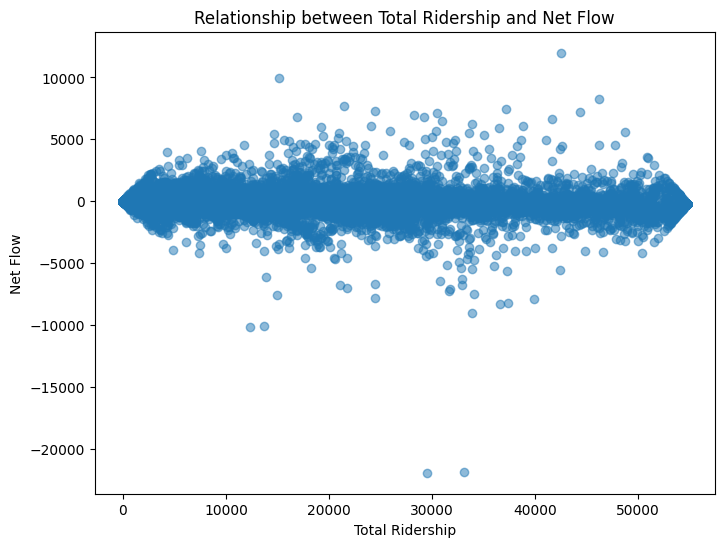

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Descriptive statistics
descriptive_stats = df_wrangled.groupby('staCode').agg(
    {'total_ridership': ['mean', 'median', 'std', 'min', 'max'],
     'net_flow': ['mean', 'median', 'std', 'min', 'max']}
)
display(descriptive_stats)

# 2. Analyze ridership trends
# Average total ridership for each day of the week
daily_ridership = df_wrangled.groupby('day_of_week')['total_ridership'].mean()
display(daily_ridership)

# Average total ridership for each month
monthly_ridership = df_wrangled.groupby(df_wrangled['trnOpDate'].dt.month)['total_ridership'].mean()
display(monthly_ridership)


# 3. Top 10 stations with highest average total ridership
top_10_stations = df_wrangled.groupby('staCode')['total_ridership'].mean().nlargest(10)
display(top_10_stations)

# 4. Relationship between day_of_week and total_ridership
day_of_week_ridership = df_wrangled.groupby('day_of_week')['total_ridership'].mean()
display(day_of_week_ridership)

# 5. Relationship between total_ridership and net_flow
correlation = df_wrangled['total_ridership'].corr(df_wrangled['net_flow'])
print(f"Correlation between total_ridership and net_flow: {correlation}")

plt.figure(figsize=(8, 6))
plt.scatter(df_wrangled['total_ridership'], df_wrangled['net_flow'], alpha=0.5)
plt.xlabel('Total Ridership')
plt.ylabel('Net Flow')
plt.title('Relationship between Total Ridership and Net Flow')
plt.show()

## Data visualization

### Subtask:
Create visualizations to illustrate the key findings from the data analysis.


**Reasoning**:
Create the visualizations as specified in the instructions, using the `df_wrangled` DataFrame.



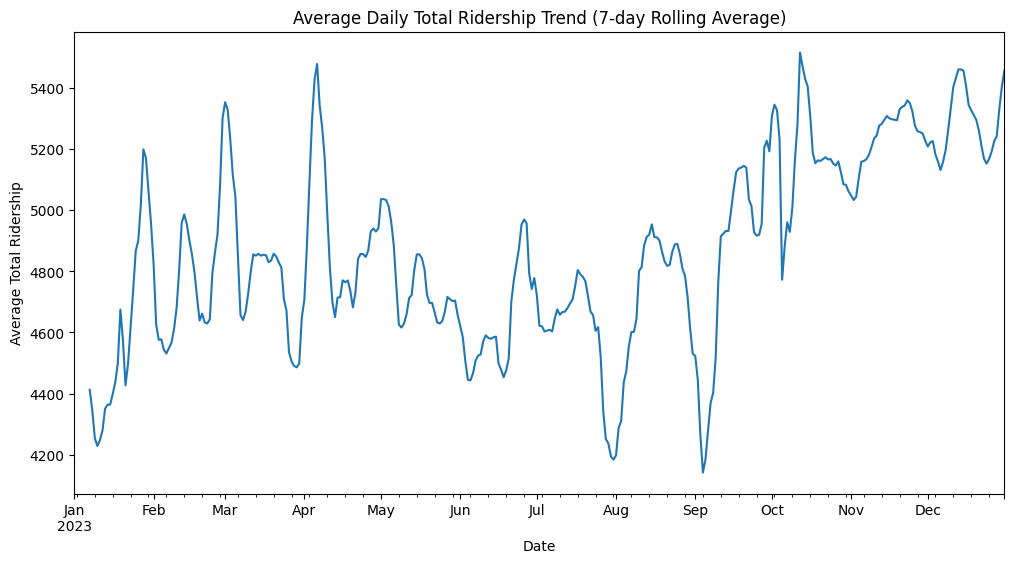

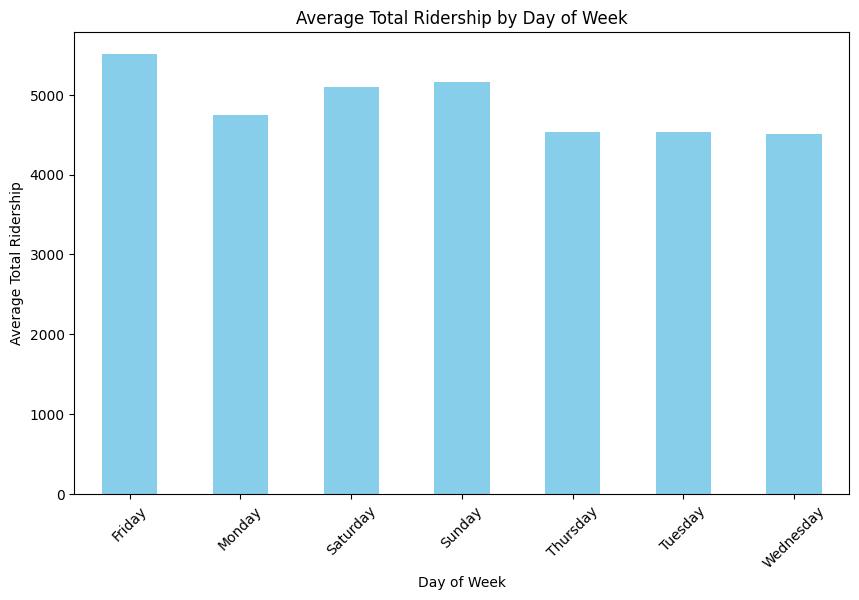

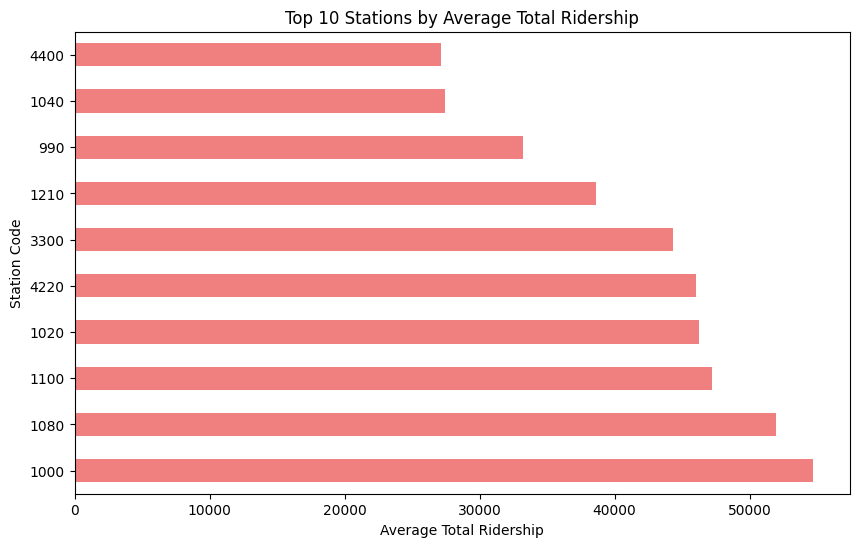

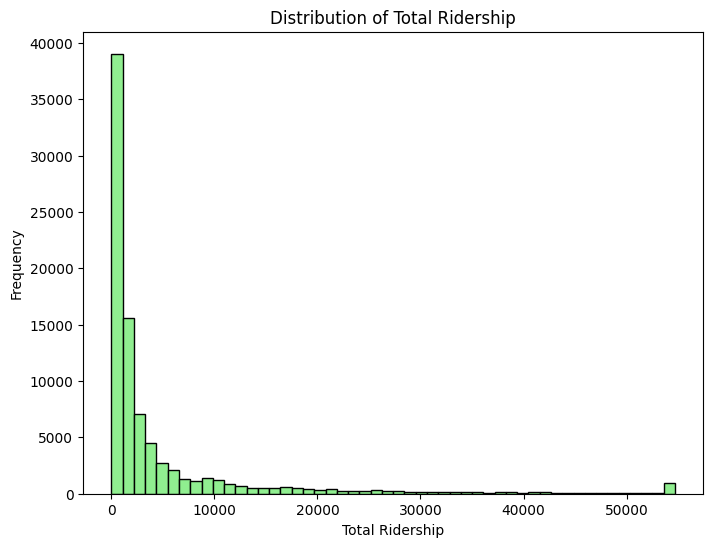

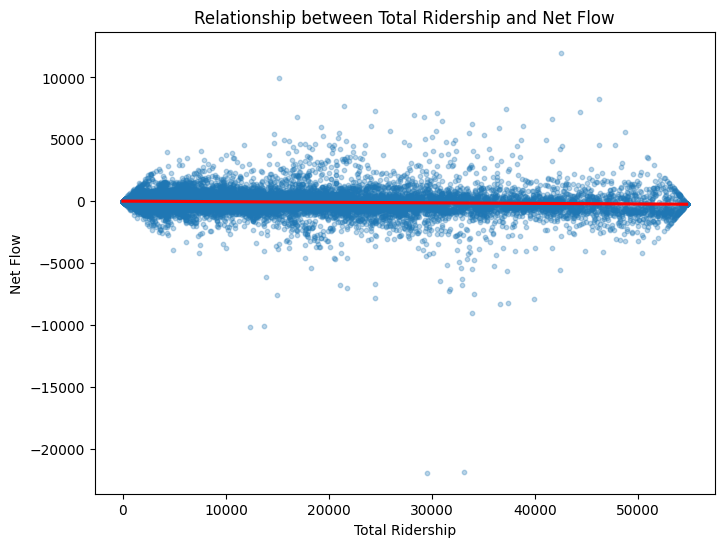

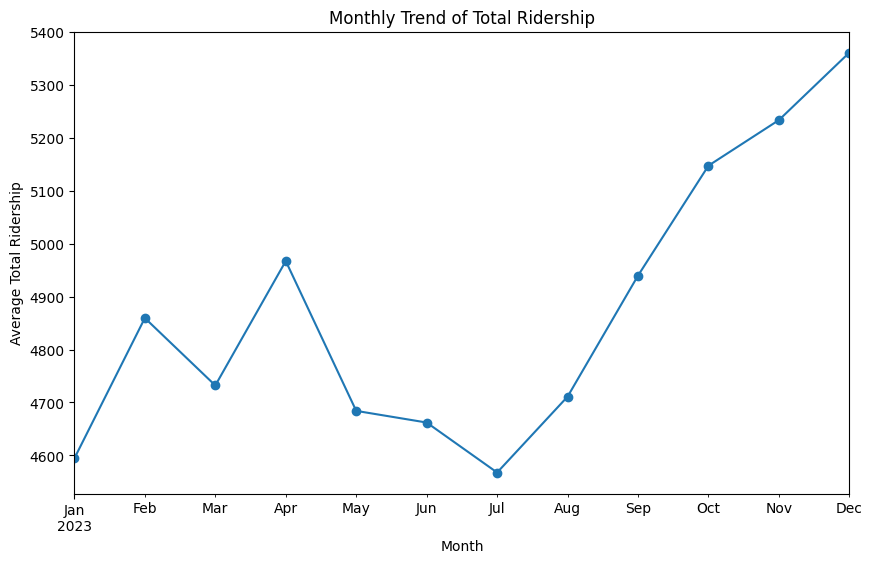

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Ridership Trend over Time
plt.figure(figsize=(12, 6))
df_wrangled.groupby('trnOpDate')['total_ridership'].mean().rolling(window=7).mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Total Ridership')
plt.title('Average Daily Total Ridership Trend (7-day Rolling Average)')
plt.show()

# 2. Ridership by Day of Week
plt.figure(figsize=(10, 6))
df_wrangled.groupby('day_of_week')['total_ridership'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Average Total Ridership')
plt.title('Average Total Ridership by Day of Week')
plt.xticks(rotation=45)
plt.show()


# 3. Top 10 Stations
plt.figure(figsize=(10, 6))
top_10_stations = df_wrangled.groupby('staCode')['total_ridership'].mean().nlargest(10)
top_10_stations.plot(kind='barh', color='lightcoral')
plt.xlabel('Average Total Ridership')
plt.ylabel('Station Code')
plt.title('Top 10 Stations by Average Total Ridership')
plt.show()

# 4. Ridership Distribution
plt.figure(figsize=(8, 6))
plt.hist(df_wrangled['total_ridership'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Total Ridership')
plt.ylabel('Frequency')
plt.title('Distribution of Total Ridership')
plt.show()

# 5. Relationship between Total Ridership and Net Flow
plt.figure(figsize=(8, 6))
sns.regplot(x='total_ridership', y='net_flow', data=df_wrangled, scatter_kws={'alpha':0.3, 's':10}, line_kws={"color": "red"})
plt.xlabel('Total Ridership')
plt.ylabel('Net Flow')
plt.title('Relationship between Total Ridership and Net Flow')
plt.show()

# 6. Monthly Ridership Trend
plt.figure(figsize=(10, 6))
df_wrangled.groupby(df_wrangled['trnOpDate'].dt.to_period('M'))['total_ridership'].mean().plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Total Ridership')
plt.title('Monthly Trend of Total Ridership')
plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided text.  However, the analysis implicitly addresses questions like:

* What are the overall ridership trends?
* How does ridership vary by day of the week and month?
* Which stations have the highest ridership?
* What is the relationship between total ridership and net flow?


### 2. Data Analysis Key Findings

* **Ridership Trends:**  Average daily ridership exhibits a general upward trend throughout the year 2023.  A 7-day rolling average helps smooth out daily fluctuations to show this trend more clearly.  Ridership is highest on Fridays and lowest on Mondays through Wednesdays.  Monthly analysis shows variations in ridership across the year.
* **Top Stations:** Stations 1000, 1080, and 1100 consistently show the highest average total ridership.
* **Total Ridership and Net Flow:** A weak negative correlation (-0.1078) exists between total ridership and net flow.  This suggests that while higher ridership tends to be associated with slightly lower net flow, the relationship is not strong.
* **Outlier Handling:** Outliers in `gateInComingCnt` and `gateOutGoingCnt` were capped at the 99th percentile using the IQR method to mitigate their influence on the analysis.


### 3. Insights or Next Steps

* **Investigate the weak negative correlation** between total ridership and net flow. Further analysis could explore if specific stations or time periods exhibit stronger relationships.  External factors, like events or holidays, could be investigated to see if they correlate with changes in net flow.
* **Deep dive into top stations:** Explore the reasons behind the high ridership at stations 1000, 1080, and 1100. Analyze the surrounding areas, demographics, and accessibility of these stations.  Consider the type of station (e.g., transfer station) and its location within the transportation network.
